<h1> Healthcare Analysis</h1>
this analysis is referrence from my school project

<h3>Tools/software use</h3>

<ul>
    <li>Knime Analytics Platform</li>
    <li>Jupyter notebook</li>
</ul>
<h4>The dataset for this project is from <a href="https://data.gov.sg/">data.gov.sg</a></h4>

<h3>Basic data Exploration</h3>



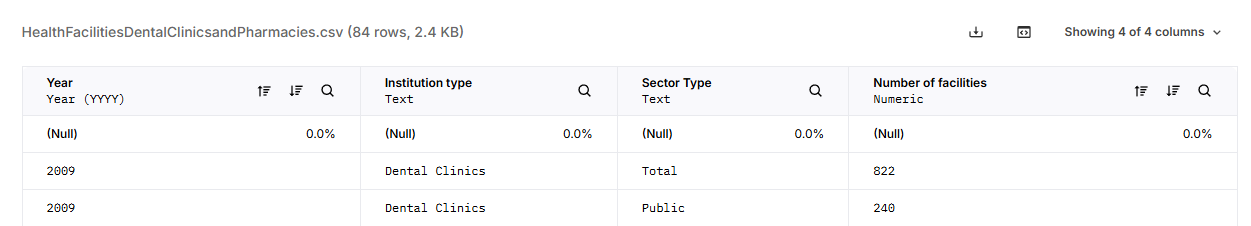
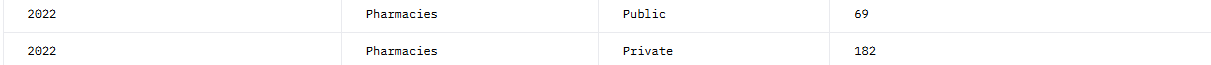

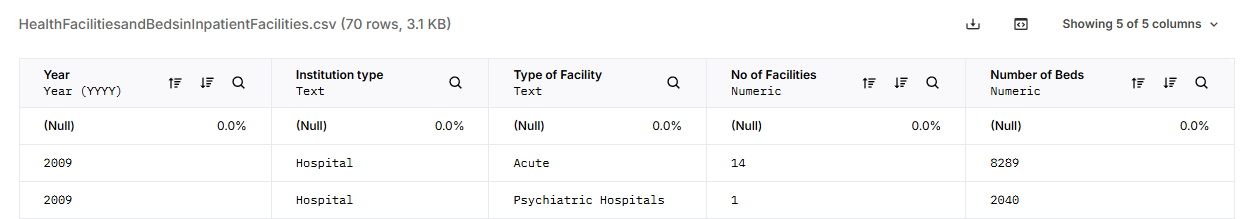
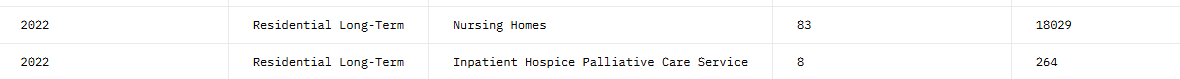

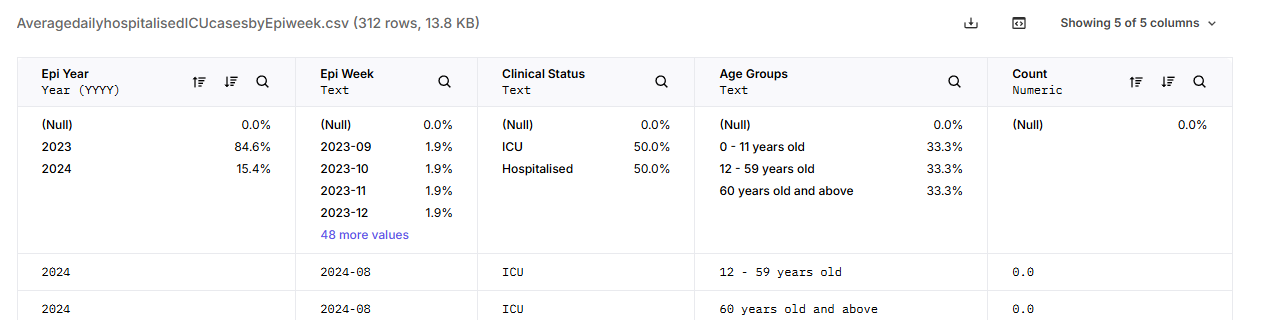
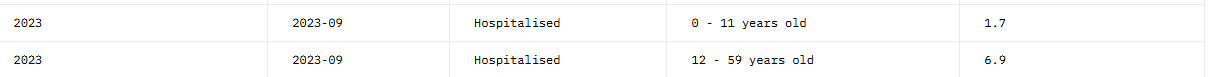

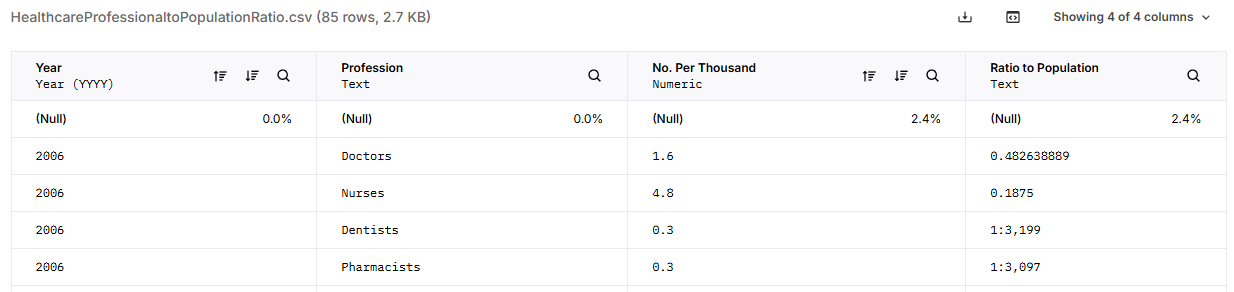
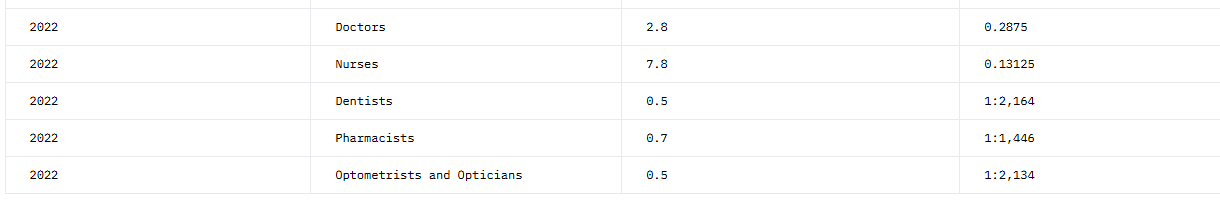

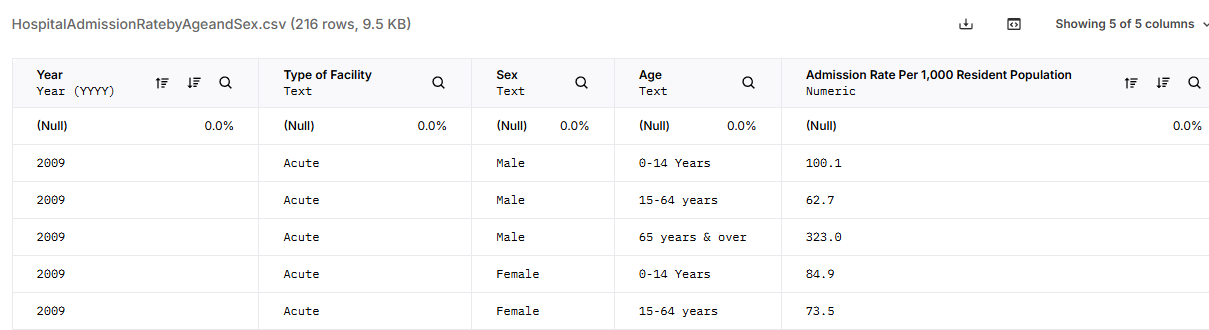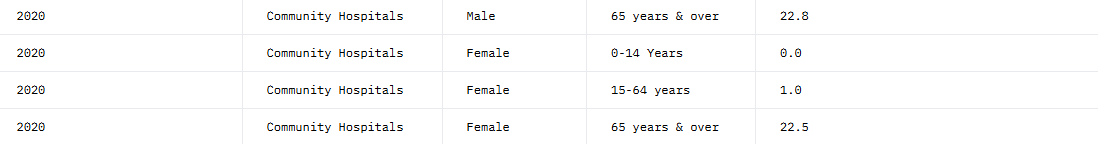

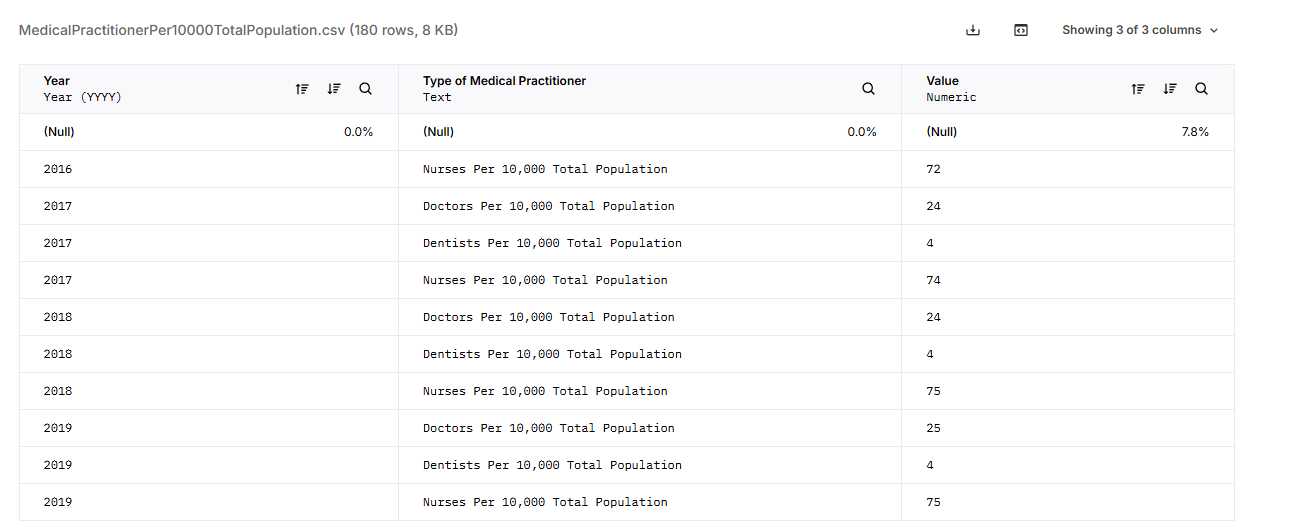

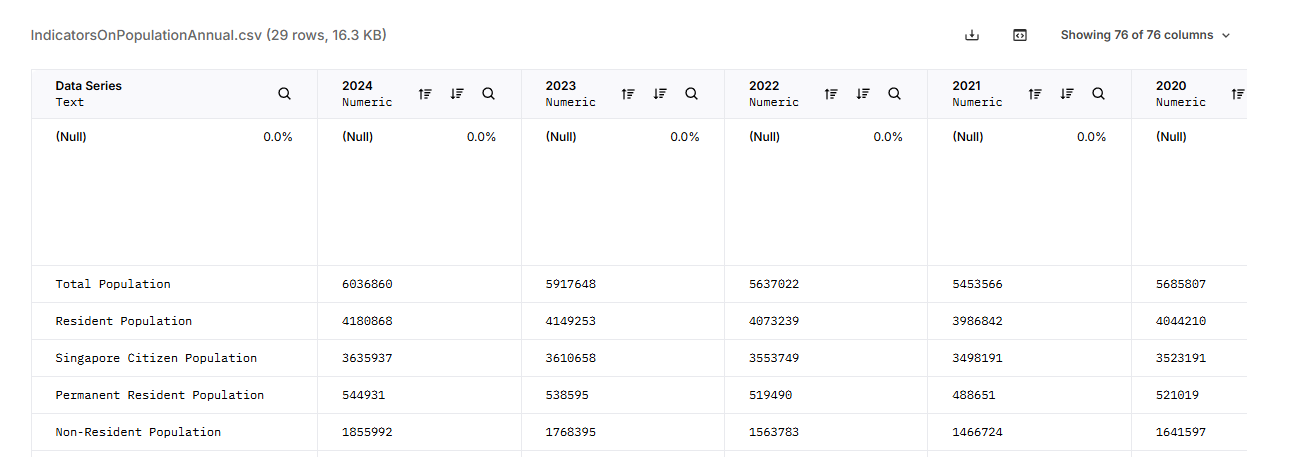

<h4>Problems with the dataset</h4>
<ul>
    <li> Most of the data start from 2009</li>
    <li> the nurses under "medical practioner" before 1973 does not have a data </li>
    <li> "professional Ratio To population" provide show inconsistency </li>
    <li> columns and rows for population need to be transpose</li>
    <li>inconsistency in the data, some data is present in 1000 and 10,000 while some data is just normal value</li>
</ul>

<h4>ways to tackle the issues</h4>
<ul>
    <li> filter out rows for the years that is before 2009</li>
    <li> the nurses under "medical practioner" before 1973 does not have a data </li>
    <li>convert all the data to fixed value </li>
    <li>joining "sg population dataset" to "professional Ratio To population" </li>
    <li> transpose columns and rows for population</li>
</ul>

<h2>Data cleaning/Feature Engineering </h2>

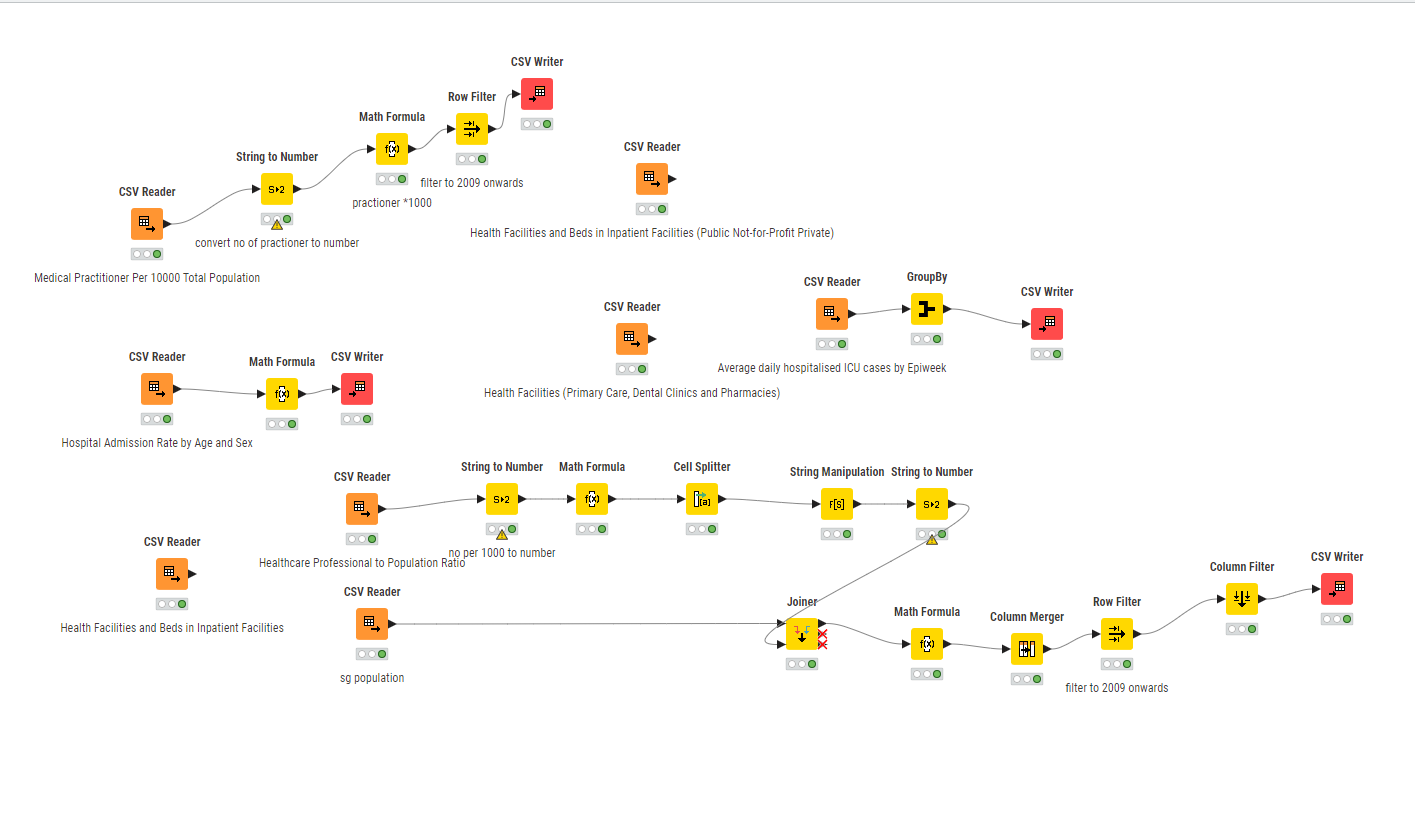

<h2>data analysis</h2>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

medical_practioner_df = pd.read_csv("MedicalPractitionerPer10000TotalPopulation.csv")

admission_df = pd.read_csv("HospitalAdmissionRatebyAgeandSex.csv")

health_facilities_df = pd.read_csv("HealthFacilitiesandBedsinInpatientFacilities\Health Facilities and Beds in Inpatient Facilities.csv")

health_facilities_df.head


<>:8: SyntaxWarning: invalid escape sequence '\H'
<>:8: SyntaxWarning: invalid escape sequence '\H'
C:\Users\Gladwyn Tay\AppData\Local\Temp\ipykernel_20604\1001351796.py:8: SyntaxWarning: invalid escape sequence '\H'
  health_facilities_df = pd.read_csv("HealthFacilitiesandBedsinInpatientFacilities\Health Facilities and Beds in Inpatient Facilities.csv")


<bound method NDFrame.head of     year       institution_type                            facility_type_a  \
0   2009               Hospital                                      Acute   
1   2009               Hospital                      Psychiatric Hospitals   
2   2009               Hospital                        Community Hospitals   
3   2009  Residential Long-Term                              Nursing Homes   
4   2009  Residential Long-Term                         Inpatient Hospices   
..   ...                    ...                                        ...   
65  2022               Hospital                                      Acute   
66  2022               Hospital                      Psychiatric Hospitals   
67  2022               Hospital                        Community Hospitals   
68  2022  Residential Long-Term                              Nursing Homes   
69  2022  Residential Long-Term  Inpatient Hospice Palliative Care Service   

    no_of_facilities  no_beds  
0

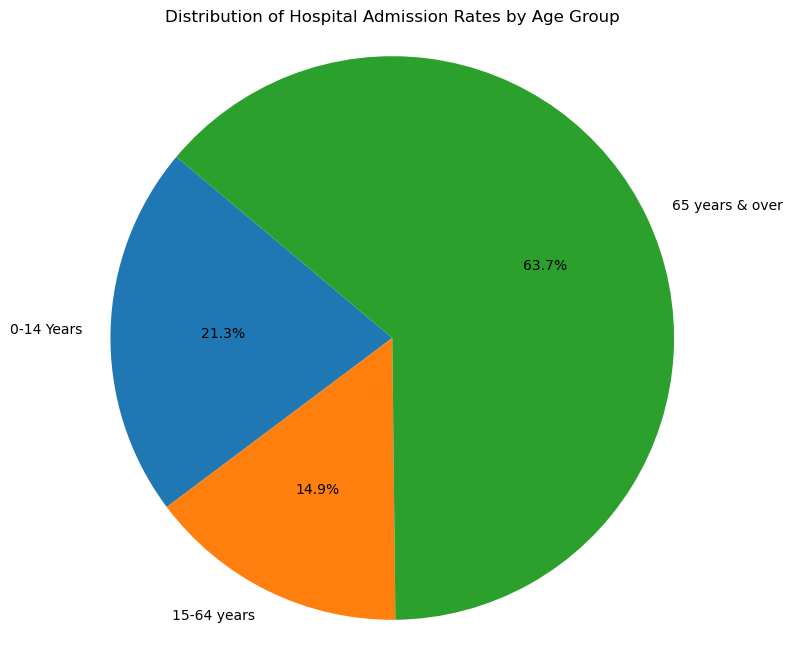

In [38]:
age_distribution = admission_df.groupby('age')['rate'].sum()
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_distribution, 
        labels=age_distribution.index, 
        autopct='%1.1f%%',
        startangle=140)

# Adding title
plt.title('Distribution of Hospital Admission Rates by Age Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Show the plot
plt.show()


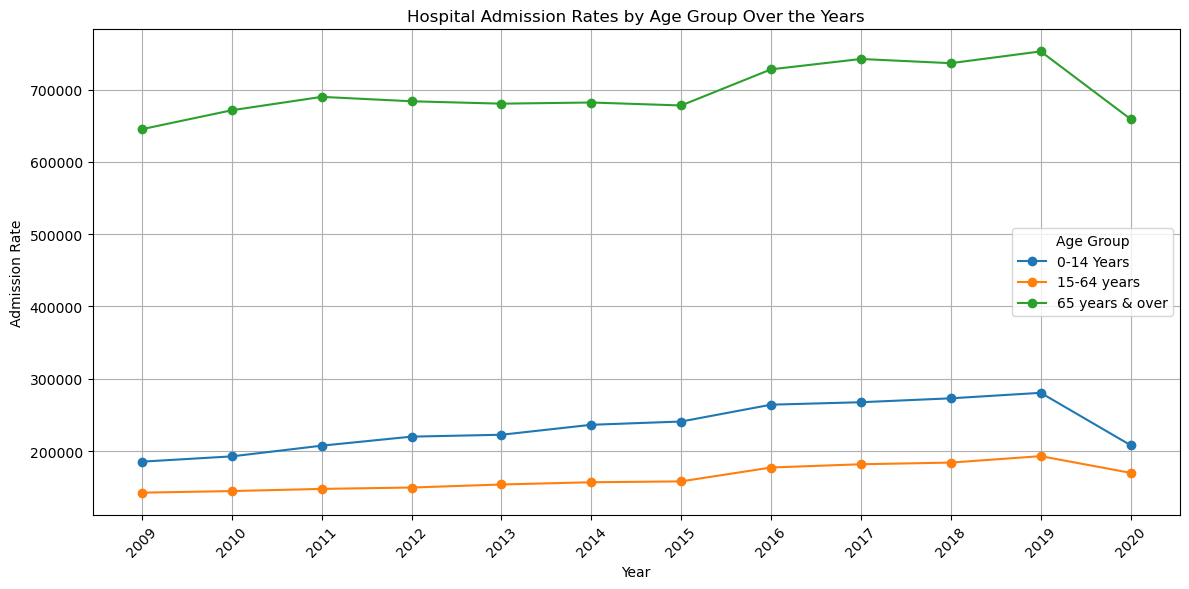

In [33]:
# Pivot the data to have years as rows and age groups as columns
pivot_data = admission_df.pivot_table(values='rate', index='year', columns='age', aggfunc='sum')
plt.figure(figsize=(12, 6))
for age_group in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[age_group], marker='o', label=age_group)
# Adding titles and labels
plt.title('Hospital Admission Rates by Age Group Over the Years')
plt.xlabel('Year')
plt.ylabel('Admission Rate')
plt.xticks(pivot_data.index, rotation=45)
plt.legend(title='Age Group')
plt.grid()
plt.tight_layout()
# Show the plot
plt.show()

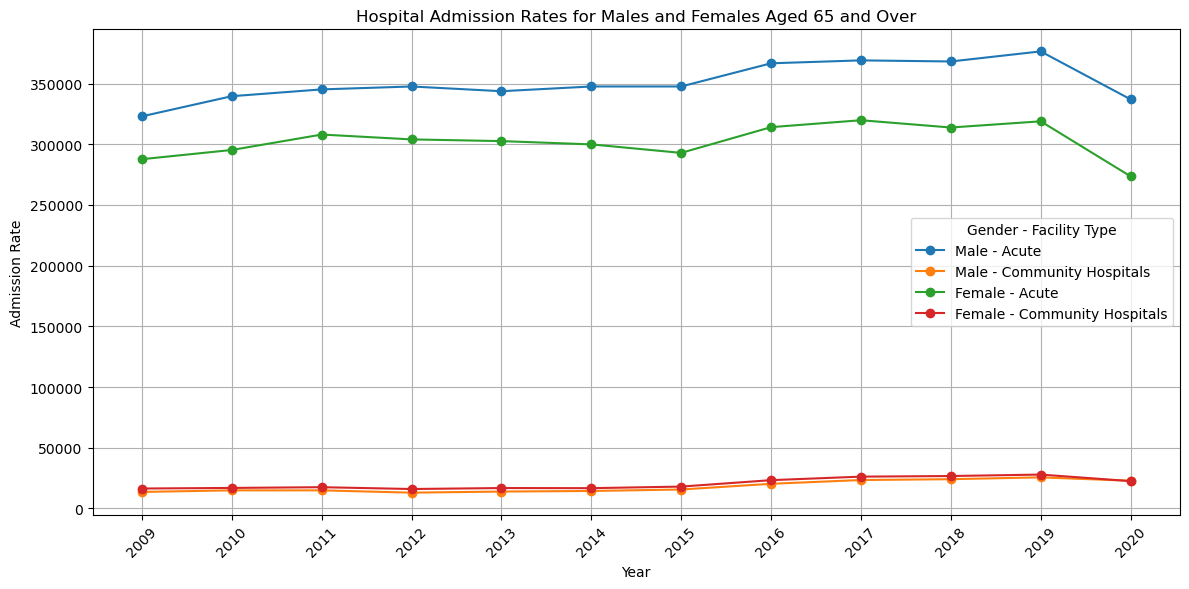

In [34]:
filtered_data = admission_df[(admission_df['age'] == '65 years & over') & 
                     (admission_df['facility_type_a'].isin(['Acute', 'Community Hospitals']))]
pivot_data = filtered_data.pivot_table(values='rate', 
                                        index='year', 
                                        columns=['sex', 'facility_type_a'], 
                                        aggfunc='sum')
# Plotting
plt.figure(figsize=(12, 6))

# Plot for each combination of sex and facility type
for sex in ['Male', 'Female']:
    for facility in ['Acute', 'Community Hospitals']:
        plt.plot(pivot_data.index, 
                 pivot_data[(sex, facility)], 
                 marker='o', 
                 label=f'{sex} - {facility}')
# Adding titles and labels
plt.title('Hospital Admission Rates for Males and Females Aged 65 and Over')
plt.xlabel('Year')
plt.ylabel('Admission Rate')
plt.xticks(pivot_data.index, rotation=45)
plt.legend(title='Gender - Facility Type')
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

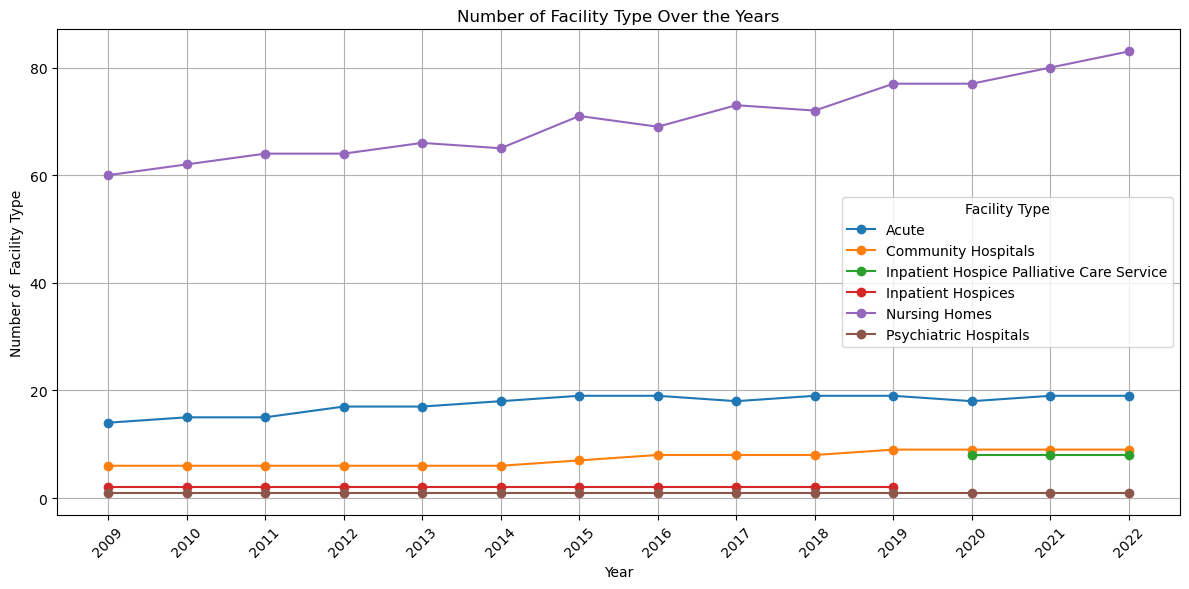

In [43]:
facility_progress = health_facilities_df.groupby(['year', 'facility_type_a'])['no_of_facilities'].sum().unstack()
plt.figure(figsize=(12, 6))
# Plot each facility type
for facility in facility_progress.columns:
    plt.plot(facility_progress.index, 
             facility_progress[facility], 
             marker='o', 
             label=facility)
# Adding titles and labels
plt.title('Number of Facility Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of  Facility Type')
plt.xticks(facility_progress.index, rotation=45)
plt.legend(title='Facility Type')
plt.grid()
plt.tight_layout()

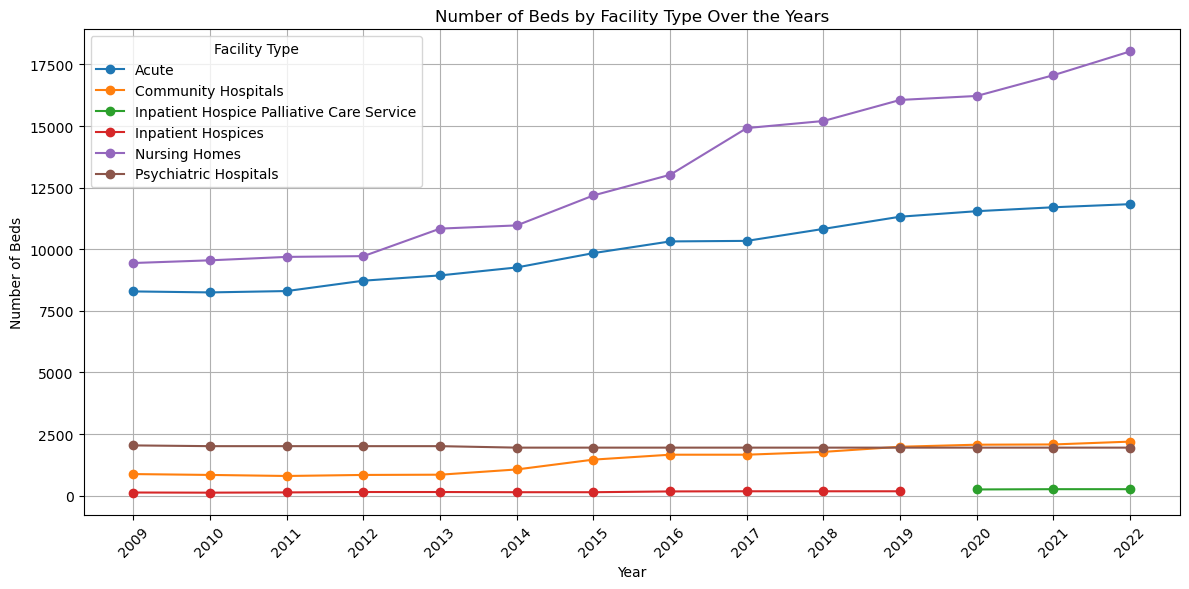

In [44]:
facility_progress = health_facilities_df.groupby(['year', 'facility_type_a'])['no_beds'].sum().unstack()
plt.figure(figsize=(12, 6))
# Plot each facility type
for facility in facility_progress.columns:
    plt.plot(facility_progress.index, 
             facility_progress[facility], 
             marker='o', 
             label=facility)
# Adding titles and labels
plt.title('Number of Beds by Facility Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Beds')
plt.xticks(facility_progress.index, rotation=45)
plt.legend(title='Facility Type')
plt.grid()
plt.tight_layout()